In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split

In [0]:
data = pd.read_sas('/content/tablatransportestrain.sas7bdat',format='sas7bdat')
data_train, data_val = train_test_split(data, test_size=0.2)

In [0]:
data_train = data_train.drop(columns='sid')
data_val = data_val.drop(columns='sid')
data_train['binaryTarget'] = data_train['binaryTarget'].apply(lambda x: int(x))
data_train['transport_mode'] = data_train['transport_mode'].apply(lambda x: int(x))
data_train['hour'] = data_train['hour'].apply(lambda x: int(x))
data_val['binaryTarget'] = data_val['binaryTarget'].apply(lambda x: int(x))
data_val['transport_mode'] = data_val['transport_mode'].apply(lambda x: int(x))
data_val['hour'] = data_val['hour'].apply(lambda x: int(x))

In [0]:
data_train['weekday_number'] = data_train['date'].dt.dayofweek
data_val['weekday_number'] = data_val['date'].dt.dayofweek

In [0]:
data_train['laboral'] = data_train['weekday_number'] 
data_train.loc[data_train['laboral'] == 0, 'laboral'] = 'Si'
data_train.loc[data_train['laboral'] == 1, 'laboral'] = 'Si'
data_train.loc[data_train['laboral'] == 2, 'laboral'] = 'Si'
data_train.loc[data_train['laboral'] == 3, 'laboral'] = 'Si'
data_train.loc[data_train['laboral'] == 4, 'laboral'] = 'Si'
data_train.loc[data_train['laboral'] == 5, 'laboral'] = 'No'
data_train.loc[data_train['laboral'] == 6, 'laboral'] = 'No'

data_val['laboral'] = data_val['weekday_number'] 
data_val.loc[data_val['laboral'] == 0, 'laboral'] = 'Si'
data_val.loc[data_val['laboral'] == 1, 'laboral'] = 'Si'
data_val.loc[data_val['laboral'] == 2, 'laboral'] = 'Si'
data_val.loc[data_val['laboral'] == 3, 'laboral'] = 'Si'
data_val.loc[data_val['laboral'] == 4, 'laboral'] = 'Si'
data_val.loc[data_val['laboral'] == 5, 'laboral'] = 'No'
data_val.loc[data_val['laboral'] == 6, 'laboral'] = 'No'

In [0]:
data_train['hora_punta'] = 0
index = data_train.loc[(data_train['hour']==7.) | (data_train['hour']==8.) | (data_train['hour']==9.) | (data_train['hour']==17.) | (data_train['hour']==18.) | (data_train['hour']==19.)].index
data_train.loc[index,'hora_punta'] = 1


data_val['hora_punta'] = 0
index = data_val.loc[(data_val['hour']==7.) | (data_val['hour']==8.) | (data_val['hour']==9.) | (data_val['hour']==17.) | (data_val['hour']==18.) | (data['hour']==19.)].index
data_val.loc[index,'hora_punta'] = 1

In [0]:
data_train['llovizna'] = 0
index = data_train.loc[(data_train['date']=='2018-10-08') |
         (data_train['date']=='2018-10-15') |
         (data_train['date']=='2018-10-16') |
         (data_train['date']=='2018-10-22') |
         (data_train['date']=='2018-10-25') |
         (data_train['date']=='2018-11-03') |
         (data_train['date']=='2018-11-04')].index

data_train.loc[index,'llovizna'] = 1

data_val['llovizna'] = 0
index = data_val.loc[(data_val['date']=='2018-10-08') |
         (data_val['date']=='2018-10-15') |
         (data_val['date']=='2018-10-16') |
         (data_val['date']=='2018-10-22') |
         (data_val['date']=='2018-10-25') |
         (data_val['date']=='2018-11-03') |
         (data_val['date']=='2018-11-04')].index

data_val.loc[index,'llovizna'] = 1


In [0]:
train_target = data_train['binaryTarget']
val_target = data_val['binaryTarget']

data_train = data_train.drop(columns='binaryTarget')
data_val = data_val.drop(columns='binaryTarget')

data_train['binaryTarget'] = train_target
data_val['binaryTarget'] = val_target

In [0]:
data_train.loc[data_train['laboral'] == 'Si','laboral'] = 1
data_train.loc[data_train['laboral'] == 'No','laboral'] = 0
data_val.loc[data_val['laboral'] == 'Si','laboral'] = 1
data_val.loc[data_val['laboral'] == 'No','laboral'] = 0

In [0]:
data_val

,date,hour,x_origin_0,y_origin_0,termicSensation_origin,x_destination_0,y_destination_0,termicSensation_destination,transport_mode,distance,price,eta,min_distance,min_price,min_eta,weekday_number,laboral,hora_punta,llovizna,binaryTarget
213441,2018-10-06,13,116.34,39.93,69.47,116.33,39.94,69.47,5,1119.0,0.0,987.0,1119.0,0.0,370.0,5,No,0,0,1
315420,2018-10-01,8,116.37,39.90,65.87,116.39,39.90,65.87,1,2448.0,200.0,1786.0,2207.0,0.0,562.0,0,Si,1,0,1
251183,2018-11-25,12,116.12,40.26,53.01,116.41,39.97,53.35,1,45974.0,1300.0,8530.0,45974.0,0.0,3689.0,6,No,0,0,1
52066,2018-10-03,18,116.34,40.09,62.40,116.37,39.86,62.39,4,37717.0,10300.0,4295.0,33680.0,0.0,4055.0,2,Si,1,0,0
241505,2018-11-21,14,116.39,39.92,39.61,116.39,39.91,39.61,1,3913.0,1500.0,2807.0,2501.0,0.0,904.0,2,Si,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76990,2018-11-29,18,116.48,39.90,33.54,116.49,39.92,33.54,5,2490.0,0.0,2158.0,2490.0,0.0,805.0,3,Si,1,0,0
129812,2018-10-13,16,116.35,39.99,65.87,116.35,39.97,65.87,1,4663.0,200.0,2626.0,2218.0,0.0,645.0,5,No,0,0,1
122743,2018-11-20,7,116.29,40.09,21.06,116.22,39.95,21.40,3,26333.0,0.0,2229.0,26333.0,0.0,2229.0,1,Si,1,0,0
303138,2018-10-28,19,116.28,39.96,56.68,116.20,39.97,56.68,3,9548.0,0.0,1420.0,8687.0,0.0,1420.0,6,No,1,0,0


In [0]:
len(data_train.columns)

20

In [0]:
train_exp = data_train.iloc[:,1:18]
train_target = data_train['binaryTarget']
val_exp = data_val.iloc[:,1:18]
val_target = data_val['binaryTarget']

# PCA

# Otro

In [0]:
data_train = pd.read_csv('/content/Datos_Train80.csv',sep=';')
data_val = pd.read_csv('/content/Datos_Val20.csv',sep=';')

FileNotFoundError: ignored

In [0]:
data_train = data_train[data_train['termicSensation_origin'].isna()==False]
data_train = data_train.drop(columns='Unnamed: 0')
data_val = data_val[data_val['termicSensation_origin'].isna()==False]
data_val = data_val.drop(columns='Unnamed: 0')

KeyError: ignored

In [0]:
data_train

,hour,termicSensation_origin,termicSensation_destination,transport_mode,distance,price,eta,min_distance,min_price,min_eta,weekday_number,hora_punta,llovizna,binaryTarget
0,17,49.65,49.65,6,6158,0,1857,5736,0,1454,0,1,0,0
1,15,58.75,58.92,1,6644,200,2988,6404,0,1362,0,0,0,1
2,15,58.75,58.92,3,6663,0,1362,6404,0,1362,0,0,0,0
3,12,53.62,53.54,1,9842,200,3037,6614,0,877,0,0,0,0
4,12,53.62,53.54,3,8496,0,877,6614,0,877,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278525,7,31.81,31.69,7,11481,600,3214,9876,0,2330,0,1,0,0
278526,7,31.81,31.69,9,11307,400,2330,9876,0,2330,0,1,0,0
278527,16,56.86,56.95,1,3151,2000,2109,2899,0,875,0,0,0,1
278528,16,56.86,56.95,3,3808,0,997,2899,0,875,0,0,0,0


In [0]:
data_train.groupby('binaryTarget').count()

,hour,termicSensation_origin,termicSensation_destination,transport_mode,distance,price,eta,min_distance,min_price,min_eta,weekday_number,hora_punta,llovizna
binaryTarget,,,,,,,,,,,,,
0,219407,219407,219407,219407,219407,219407,219407,219407,219407,219407,219407,219407,219407
1,59123,59123,59123,59123,59123,59123,59123,59123,59123,59123,59123,59123,59123


In [0]:
data_val.groupby('binaryTarget').count()

,hour,termicSensation_origin,termicSensation_destination,transport_mode,distance,price,eta,min_distance,min_price,min_eta,weekday_number,hora_punta,llovizna
binaryTarget,,,,,,,,,,,,,
0,54679,54679,54679,54679,54679,54679,54679,54679,54679,54679,54679,54679,54679
1,15009,15009,15009,15009,15009,15009,15009,15009,15009,15009,15009,15009,15009


In [0]:
print('\nProporción de 1s en train: %.2f'%(59123/(219407+59123) * 100))
print('\nProporción de 1s en validation: %.2f'%(15009/(54679+15009)*100))


Proporción de 1s en train: 21.23

Proporción de 1s en validation: 21.54


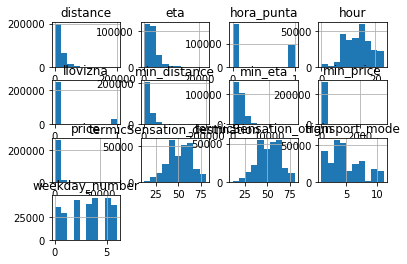

In [0]:
data_train.drop(['binaryTarget'],1).hist()
plt.show()

In [0]:
var_exp_train = np.array(data_train.drop(['binaryTarget'],1))
target_train = np.array(data_train['binaryTarget'])
var_exp_train.shape

(278530, 13)

# Modelo

Compilamos el modelo.

In [0]:
model = linear_model.LogisticRegression()
model.fit(train_exp,train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

Evaluamos nuestro modelo.

In [0]:
predictions = model.predict(val_exp)
print(predictions[0:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
accuracy_score(predictions,target_val)

0.7861583746141144

In [0]:
print(confusion_matrix(predictions,target_val))

[[54534 14637]
 [  256   218]]


In [0]:
print(classification_report(predictions,target_val))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     69171
           1       0.01      0.46      0.03       474

    accuracy                           0.79     69645
   macro avg       0.51      0.62      0.45     69645
weighted avg       0.99      0.79      0.87     69645

